# Space X Falcon 9 First Stage Landing Prediction

## Machine Learning Prediction

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. In this lab, you will create a machine learning pipeline to predict if the first stage will land given the data from the preceding labs.

## Objectives

Perform exploratory Data Analysis and determine Training Labels

1. create a column for the class
2. Standardize the data
3. Split into training data and test data

Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

1. Find the method performs best using test data

## Import Libraries and Define Auxiliary Functions

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Define function to plot the confusion matrix

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot = True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe

In [3]:
# Load dataframe

data = pd.read_csv('dataset_part_2.csv')
data.head(5)

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6123.547647   LEO  CCSFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCSFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCSFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCSFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      0  
1            0  B0005  -80.577366  28.561857      0  
2            0  B0007  -80.577366  28.561857      0  
3            0  B1003 -120.610829  34.632093      0  
4            0  B1004  -80.577366  28.561857      0

In [4]:
# Load dataframe

X = pd.read_csv('dataset_part_3.csv')
X.head(100)

Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  Orbit_LEO  \
0         False      False      False      False      False       True   
1         False      False      False      False      False       True   
2         False      False      False      False       True      False   
3         False      False      False      False      False      False   
4         False      False       True      False      False      False   
..          ...        ...        ...        ...        ...        ...   
85        False      False      False      False      False      False   
86        False      False      False      False      False      False   
87        False      False      False      False      False      False   
88        False      False      False      False      False      False   
89        False      False      False      False      False      False   

    Orbit_MEO  Orbit_PO  Orbit_SO  Orbit_SSO  ...  Serial_B1048  Serial_B1049  \
0       False     False     False      False  ...         False         False   
1       False     False     False      False  ...         False         False   
2       False     False     False      False  ...         False         False   
3       False      True     False      False  ...         False         False   
4       False     False     False      False  ...         False         False   
..        ...       ...       ...        ...  ...           ...           ...   
85      False     False     False      False  ...         False         False   
86      False     False     False      False  ...         False         False   
87      False     False     False      False  ...         False         False   
88      False     False     False      False  ...         False         False   
89       True     False     False      False  ...         False         False   

    Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0          False         False         False         False         False   
1          False         False         False         False         False   
2          False         False         False         False         False   
3          False         False         False         False         False   
4          False         False         False         False         False   
..           ...           ...           ...           ...           ...   
85         False         False         False         False         False   
86         False         False         False         False          True   
87         False          True         False         False         False   
88         False         False         False         False         False   
89         False         False         False         False         False   

    Serial_B1059  Serial_B1060  Serial_B1062  
0          False         False         False  
1          False         False         False  
2          False         False         False  
3          False         False         False  
4          False         False         False  
..           ...           ...           ...  
85         False          True         False  
86         False         False         False  
87         False         False         False  
88         False          True         False  
89         False         False          True  

[90 rows x 72 columns]

## Task 1

Create a NumPy array from the column Class in data, by applying the method to_numpy() then assign it to the variable Y,make sure the output is a Pandas series (only one bracket df['name of column'])

In [5]:
Y = pd.Series(data['Class'].to_numpy())
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    0
9    0
dtype: int64

## Task 2

Standardize the data in X then reassign it to the variable X using the transform provided below.

In [6]:
transform = preprocessing.StandardScaler()

In [7]:
X = transform.fit(X).transform(X)

We split the data into training and testing data using the function train_test_split. The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function GridSearchCV.

## Task 3

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [9]:
Y_test.shape

(18,)

## Task 4

Create a logistic regression object using then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [10]:
parameters = {'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [11]:
parameters = {"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr = LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters, cv = 10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [12]:
print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.6964285714285714


## Task 5

Calculate the accuracy on the test data using the method score:

In [13]:
logreg_accuracy = logreg_cv.score(X_test, Y_test)
logreg_accuracy

0.7777777777777778

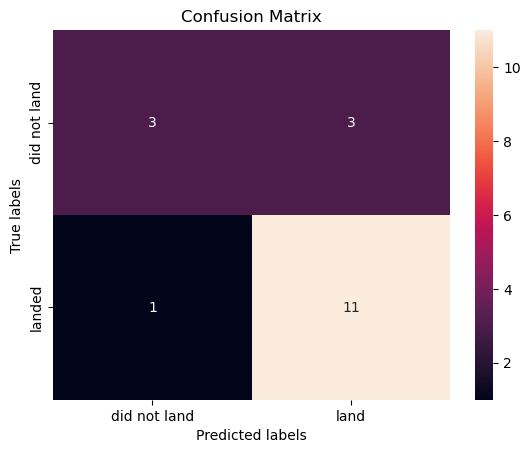

In [14]:
logreg_yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, logreg_yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the major problem is false positives.

## Task 6

Create a support vector machine object then create a GridSearchCV object svm_cv with cv - 10. Fit the object to find the best parameters from the dictionary parameters.

In [15]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [16]:
svm_cv = GridSearchCV(svm, parameters, cv = 10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [17]:
print("tuned hpyerparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 31.622776601683793, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.7964285714285715


## Task 7

Calculate the accuracy on the test data using the method score:

In [18]:
svm_accuracy = svm_cv.score(X_test, Y_test)
svm_accuracy

0.9444444444444444

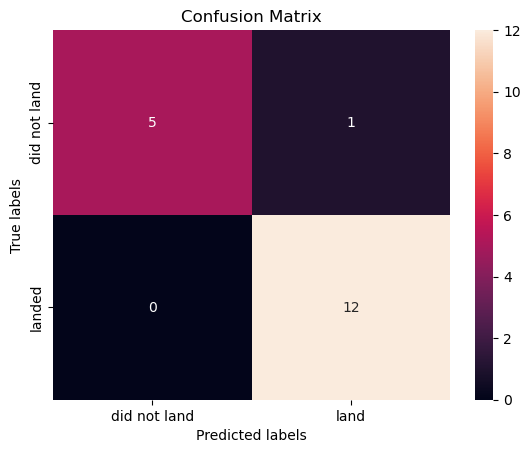

In [19]:
svm_yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, svm_yhat)

## Task 8

Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [20]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [21]:
tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train, Y_train)

/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_co

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [22]:
print("tuned hpyerparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.7785714285714287


## Task 9

Calculate the accuracy of tree_cv on the test data using the method score:

In [23]:
tree_accuracy = tree_cv.score(X_test, Y_test)
tree_accuracy

0.8333333333333334

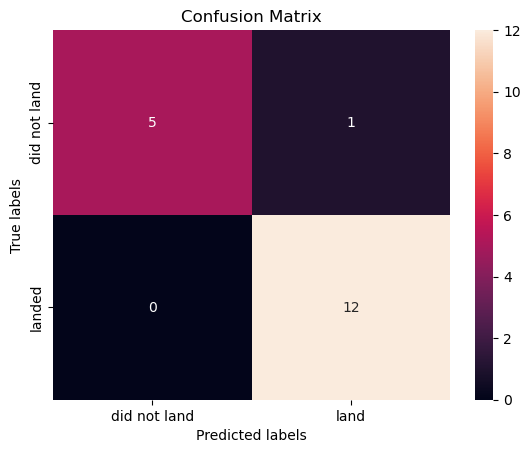

In [24]:
tree_yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, tree_yhat)

## Task 10

Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [25]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [26]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [27]:
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.7392857142857142


## Task 11

Calculate the accuracy of tree_cv on the test data using the method score:

In [28]:
knn_accuracy = knn_cv.score(X_test, Y_test)
knn_accuracy

0.7222222222222222

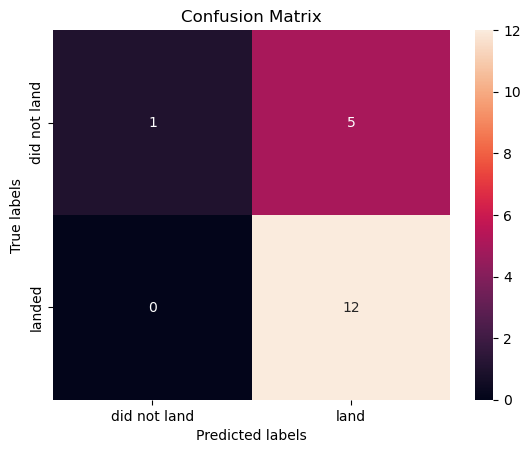

In [29]:
knn_yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, knn_yhat)

## Task 12

Find the method performs best:

In [30]:
from sklearn.metrics import jaccard_score, f1_score

# Examining the scores from Test sets
jaccard_scores = [
                  jaccard_score(Y_test, logreg_yhat, average = 'binary'),
                  jaccard_score(Y_test, svm_yhat, average = 'binary'),
                  jaccard_score(Y_test, tree_yhat, average = 'binary'),
                  jaccard_score(Y_test, knn_yhat, average = 'binary'),
                 ]

f1_scores = [
             f1_score(Y_test, logreg_yhat, average = 'binary'),
             f1_score(Y_test, svm_yhat, average = 'binary'),
             f1_score(Y_test, tree_yhat, average = 'binary'),
             f1_score(Y_test, knn_yhat, average = 'binary'),
            ]

accuracy = [logreg_accuracy, svm_accuracy, tree_accuracy, knn_accuracy]

scores = pd.DataFrame(np.array([jaccard_scores, f1_scores, accuracy]), index = ['Jaccard_Score', 'F1_Score', 'Accuracy'] , columns=['LogReg', 'SVM', 'Tree', 'KNN'])
scores

LogReg       SVM      Tree       KNN
Jaccard_Score  0.733333  0.923077  0.923077  0.705882
F1_Score       0.846154  0.960000  0.960000  0.827586
Accuracy       0.777778  0.944444  0.833333  0.722222

In [31]:
# Examining the scores from the whole Dataset
jaccard_scores = [
                  jaccard_score(Y, logreg_cv.predict(X), average = 'binary'),
                  jaccard_score(Y, svm_cv.predict(X), average = 'binary'),
                  jaccard_score(Y, tree_cv.predict(X), average = 'binary'),
                  jaccard_score(Y, knn_cv.predict(X), average = 'binary'),
                 ]

f1_scores = [
             f1_score(Y, logreg_cv.predict(X), average = 'binary'),
             f1_score(Y, svm_cv.predict(X), average = 'binary'),
             f1_score(Y, tree_cv.predict(X), average = 'binary'),
             f1_score(Y, knn_cv.predict(X), average = 'binary'),
            ]

accuracy = [logreg_cv.score(X, Y), svm_cv.score(X, Y), tree_cv.score(X, Y), knn_cv.score(X, Y)]

scores = pd.DataFrame(np.array([jaccard_scores, f1_scores, accuracy]),
                      index = ['Jaccard_Score', 'F1_Score', 'Accuracy'],
                      columns = ['LogReg', 'SVM', 'Tree', 'KNN'])
scores

LogReg       SVM      Tree       KNN
Jaccard_Score  0.921875  0.906250  0.760000  0.740741
F1_Score       0.959350  0.950820  0.863636  0.851064
Accuracy       0.944444  0.933333  0.800000  0.766667

## Conclusion

1. Based on the scores of the Test Set, we can not confirm which method perfoms best.
2. Same Test Set scores may be due to the small test sample size (18 samples). Therefore, we tested all methods based on the whole Dataset.
3. The scores of the whole Dataset confirm that the best model is the Decision Tree Model. This model has not only higher scores, but also the highest accuracy.

## -END-